1. Load Libraries and Files python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns

# Load the CSV files into dataframes
properties_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/365datascience/properties.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/365datascience/customers.csv')


2. Data Cleaning and Preprocessing


In [ ]:
# Drop the 'Unnamed: 0' column if it exists
properties_df = properties_df.drop(columns=['Unnamed: 0'], errors='ignore')
customers_df = customers_df.drop(columns=['Unnamed: 0'], errors='ignore')


In [ ]:
# Convert 'price' column to numeric
properties_df['price'] = properties_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
# Convert 'date_sale' and 'birth_date' to datetime
properties_df['date_sale'] = pd.to_datetime(properties_df['date_sale'], format='%m/%d/%Y', errors='coerce')
customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'], format='%m/%d/%Y', errors='coerce')


In [ ]:
# Standardize 'customerid' in both datasets
properties_df['customerid'] = properties_df['customerid'].str.strip()
customers_df.rename(columns={customers_df.columns[0]: 'customerid'}, inplace=True)


3. Merge the Datasets


In [ ]:
# Merge the datasets on 'customerid'
merged_df = pd.merge(properties_df, customers_df, on='customerid', how='inner')

# Verify the merged dataset
print(merged_df.info())
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ﻿id                195 non-null    int64         
 1   building           195 non-null    int64         
 2   date_sale          195 non-null    datetime64[ns]
 3   type               195 non-null    object        
 4   property#          195 non-null    int64         
 5   area               195 non-null    float64       
 6   price              195 non-null    float64       
 7   status             195 non-null    object        
 8   customerid         195 non-null    object        
 9   entity             195 non-null    object        
 10  name               195 non-null    object        
 11  surname            195 non-null    object        
 12  birth_date         178 non-null    datetime64[ns]
 13  sex                178 non-null    object        
 14  country   

,﻿id,building,date_sale,type,property#,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5,No,Website
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5,No,Website
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1,Yes,Client
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4,No,Agency


4. Save or Use the Merged Data

In [ ]:
# Optionally, save the merged dataset to a CSV file
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/365datascience/merged_real_estate_data.csv', index=False)
files.download('merged_real_estate_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Descriptive Statistics

In [ ]:
# Generate and display descriptive statistics for the merged dataset
descriptive_stats = merged_df.describe(include='all')
print(descriptive_stats)


                ﻿id    building                      date_sale       type  \
count    195.000000  195.000000                            195        195   
unique          NaN         NaN                            NaN          2   
top             NaN         NaN                            NaN  Apartment   
freq            NaN         NaN                            NaN        188   
mean    2591.425641    2.564103  2006-11-08 14:38:46.153846272        NaN   
min     1002.000000    1.000000            2004-03-01 00:00:00        NaN   
25%     2003.500000    2.000000            2006-04-16 00:00:00        NaN   
50%     2054.000000    2.000000            2007-03-01 00:00:00        NaN   
75%     3048.500000    3.000000            2007-09-01 00:00:00        NaN   
max     5051.000000    5.000000            2010-05-01 00:00:00        NaN   
std     1244.617996    1.243434                            NaN        NaN   

         property#         area          price  status customerid      enti

5.1. Sales Performance by Building Type

In [ ]:
# Analyze sales performance by building type
sales_by_building = merged_df.groupby('building').agg(
    total_sales=('price', 'sum'),
    average_price=('price', 'mean'),
    total_properties=('customerid', 'count'),
    average_deal_satisfaction=('deal_satisfaction', 'mean')
).reset_index()

# Display the results
print("Sales Performance by Building Type")
print(sales_by_building)


Sales Performance by Building Type
   building  total_sales  average_price  total_properties  \
0         1  12660073.51  275218.989348                46   
1         2  15064176.13  278966.224630                54   
2         3  13739779.13  259241.115660                53   
3         4   6318607.24  274722.053913                23   
4         5   4757103.37  250373.861579                19   

   average_deal_satisfaction  
0                   3.630435  
1                   3.518519  
2                   3.566038  
3                   3.869565  
4                   3.526316  


5.2. Sales Performance by Country and State

In [ ]:
# Analyze sales performance by country
sales_by_country = merged_df.groupby('country').agg(
    total_sales=('price', 'sum'),
    average_price=('price', 'mean'),
    total_properties=('customerid', 'count'),
    average_deal_satisfaction=('deal_satisfaction', 'mean')
).reset_index()

# Display sales performance by country
print("Sales Performance by Country")
print(sales_by_country)

# Analyze sales performance by state
sales_by_state = merged_df.groupby('state').agg(
    total_sales=('price', 'sum'),
    average_price=('price', 'mean'),
    total_properties=('customerid', 'count'),
    average_deal_satisfaction=('deal_satisfaction', 'mean')
).reset_index()

# Calculate relative and cumulative frequency
sales_by_state['relative_frequency'] = sales_by_state['total_properties'] / sales_by_state['total_properties'].sum()
sales_by_state['cumulative_frequency'] = sales_by_state['relative_frequency'].cumsum()

# Display sales performance by state
print("\nSales Performance by State")
print(sales_by_state)


Sales Performance by Country
   country  total_sales  average_price  total_properties  \
0  Belgium    458150.94  229075.470000                 2   
1   Canada   1918485.69  274069.384286                 7   
2  Denmark    257183.48  257183.480000                 1   
3  Germany    205098.21  205098.210000                 1   
4   Mexico    338181.18  338181.180000                 1   
5   Russia   1115315.34  278828.835000                 4   
6       UK    440285.36  220142.680000                 2   
7      USA  44666887.16  270708.407030               165   
8     USA    3140152.02  261679.335000                12   

   average_deal_satisfaction  
0                    3.00000  
1                    5.00000  
2                    1.00000  
3                    5.00000  
4                    3.00000  
5                    2.50000  
6                    4.00000  
7                    3.49697  
8                    4.75000  

Sales Performance by State
        state  total_sales  aver

5.3. Data Analysis (Analyze Age and Properties)

In [ ]:
# Calculate age at the time of purchase
merged_df['age_at_purchase'] = (merged_df['date_sale'] - merged_df['birth_date']).dt.days // 365

# Define age bins and labels
age_bins = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
age_labels = [
    '(19.0, 25.0]', '(25.0, 31.0]', '(31.0, 36.0]', '(36.0, 42.0]',
    '(42.0, 48.0]', '(48.0, 54.0]', '(54.0, 59.0]', '(59.0, 65.0]',
    '(65.0, 71.0]', '(71.0, 76.0]'
]

# Categorize age intervals
merged_df['age_group'] = pd.cut(merged_df['age_at_purchase'], bins=age_bins, labels=age_labels, right=True)

# Analyze sales by age group
sales_by_age_group = merged_df.groupby('age_group').agg(
    total_properties=('property#', 'count'),
    average_price=('price', 'mean')
).reset_index()

print("Sales by Age Group")
print(sales_by_age_group)

# Define price bins
price_bins = np.linspace(merged_df['price'].min(), merged_df['price'].max(), 11)

# Categorize price intervals
merged_df['price_group'] = pd.cut(merged_df['price'], bins=price_bins)

# Analyze sales by price group
sales_by_price_group = merged_df.groupby('price_group').agg(
    total_properties=('property#', 'count'),
    average_age=('age_at_purchase', 'mean')
).reset_index()

print("\nSales by Price Group")
print(sales_by_price_group)

# Correlation between age and property price
correlation_age_price = merged_df[['age_at_purchase', 'price']].corr().iloc[0, 1]
print(f"\nCorrelation between Age and Property Price: {correlation_age_price}")


Sales by Age Group
      age_group  total_properties  average_price
0  (19.0, 25.0]                 8  311719.736250
1  (25.0, 31.0]                17  286550.928235
2  (31.0, 36.0]                23  275511.028261
3  (36.0, 42.0]                32  287831.222500
4  (42.0, 48.0]                30  265492.933000
5  (48.0, 54.0]                17  246009.544706
6  (54.0, 59.0]                24  267717.773333
7  (59.0, 65.0]                11  253495.328182
8  (65.0, 71.0]                11  240013.311818
9  (71.0, 76.0]                 4  268106.202500

Sales by Price Group
                price_group  total_properties  average_age
0   (117564.07, 158739.391]                 1    68.000000
1  (158739.391, 199914.712]                23    41.047619
2  (199914.712, 241090.033]                69    48.145161
3  (241090.033, 282265.354]                38    46.914286
4  (282265.354, 323440.675]                22    46.761905
5  (323440.675, 364615.996]                13    43.083333
6  (364

<ipython-input-16-0c4a7e979558>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_group = merged_df.groupby('age_group').agg(
<ipython-input-16-0c4a7e979558>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_group = merged_df.groupby('price_group').agg(


6. Data Visualization

6.1. Deal Satisfaction by Country

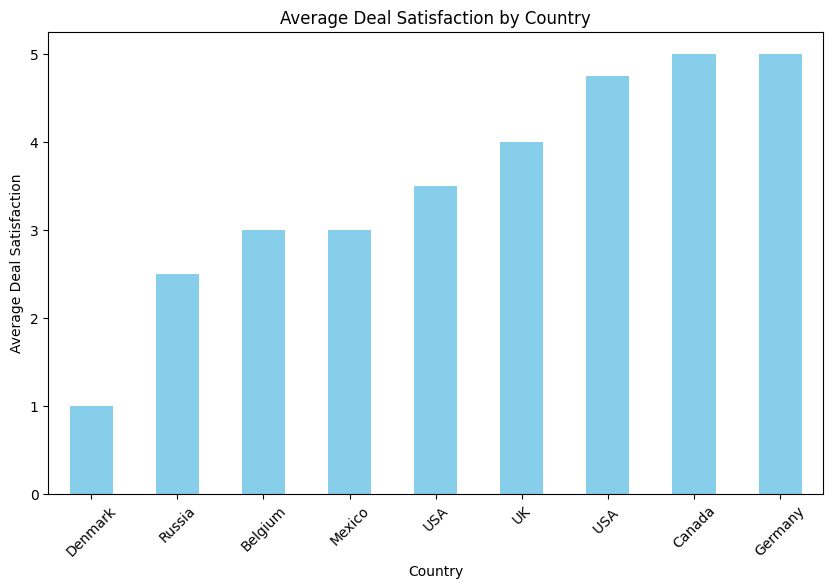

In [ ]:
import matplotlib.pyplot as plt

# Deal Satisfaction by Country
plt.figure(figsize=(10, 6))
merged_df.groupby('country')['deal_satisfaction'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Deal Satisfaction by Country')
plt.ylabel('Average Deal Satisfaction')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


6.2. Monthly Revenue Over Time

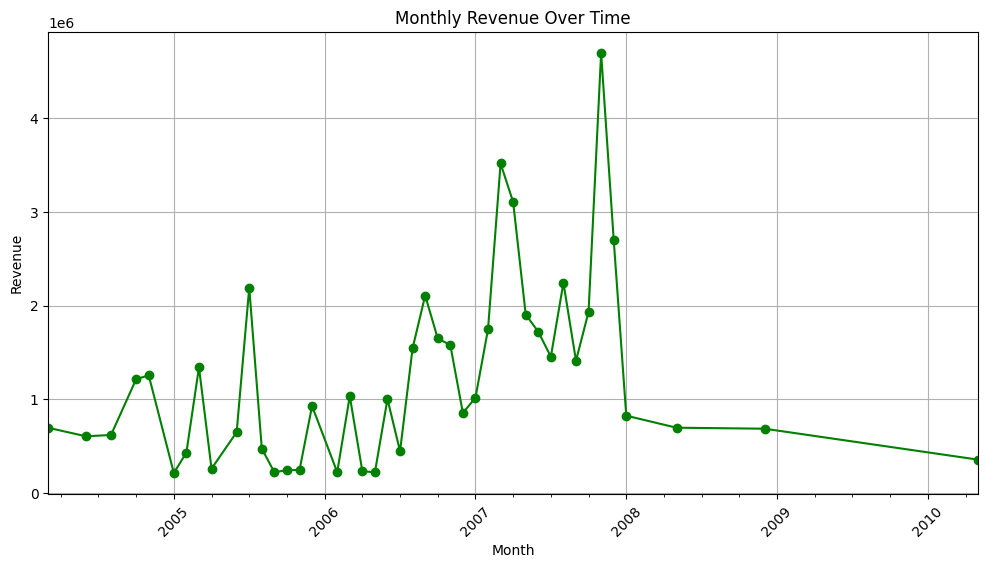

In [ ]:
# Monthly Revenue Graph
monthly_revenue = merged_df.groupby(merged_df['date_sale'].dt.to_period('M'))['price'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


6.3. Apartments Sold by State

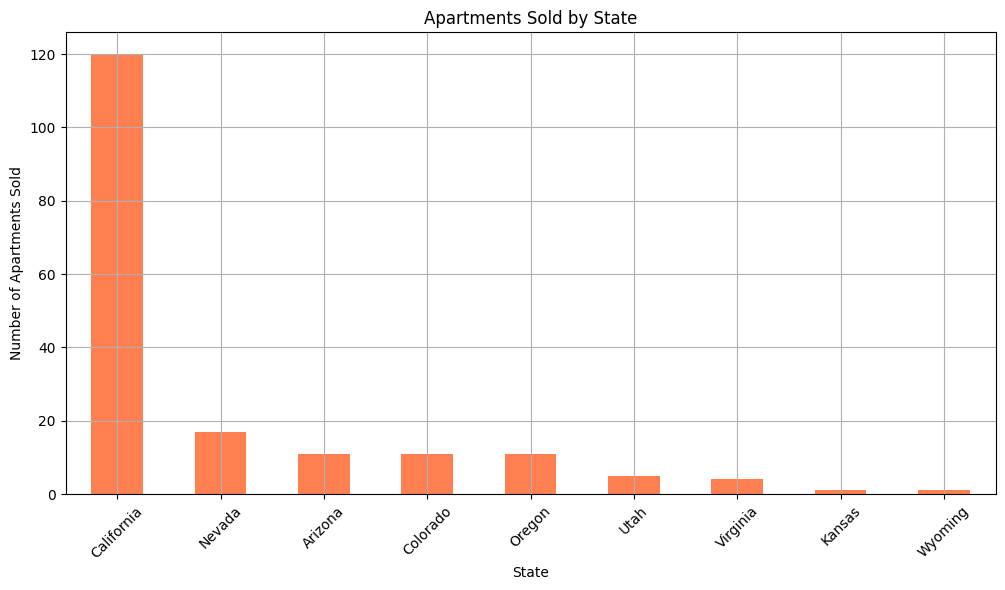

In [ ]:
# Apartments Sold by State
sales_by_state_sorted = sales_by_state.sort_values(by='total_properties', ascending=False)
sales_by_state_sorted.plot(kind='bar', x='state', y='total_properties', color='coral', figsize=(12, 6), legend=False)
plt.title('Apartments Sold by State')
plt.ylabel('Number of Apartments Sold')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


6.4. Age Distribution Histogram

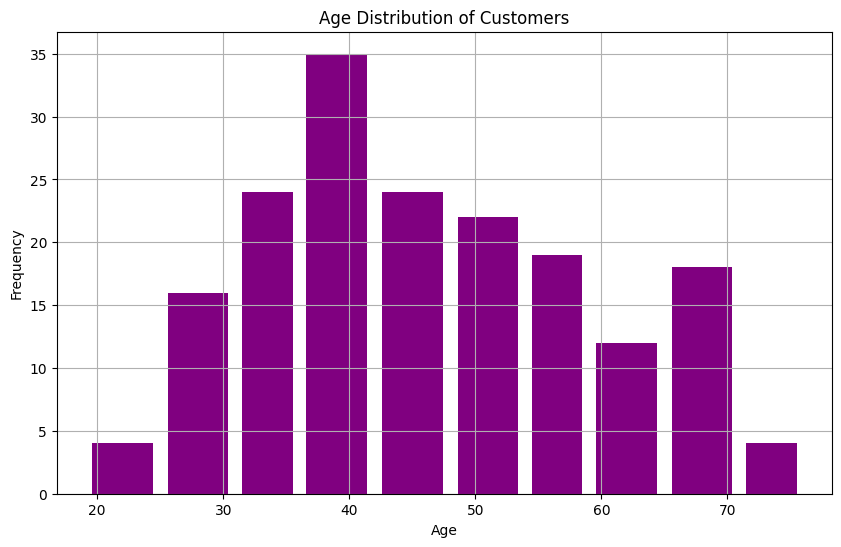

In [ ]:
# Age Distribution Histogram
plt.figure(figsize=(10, 6))
merged_df['age_at_purchase'].dropna().plot(kind='hist', bins=age_bins, color='purple', rwidth=0.8)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


6.5. Yearly Sales by Building Type

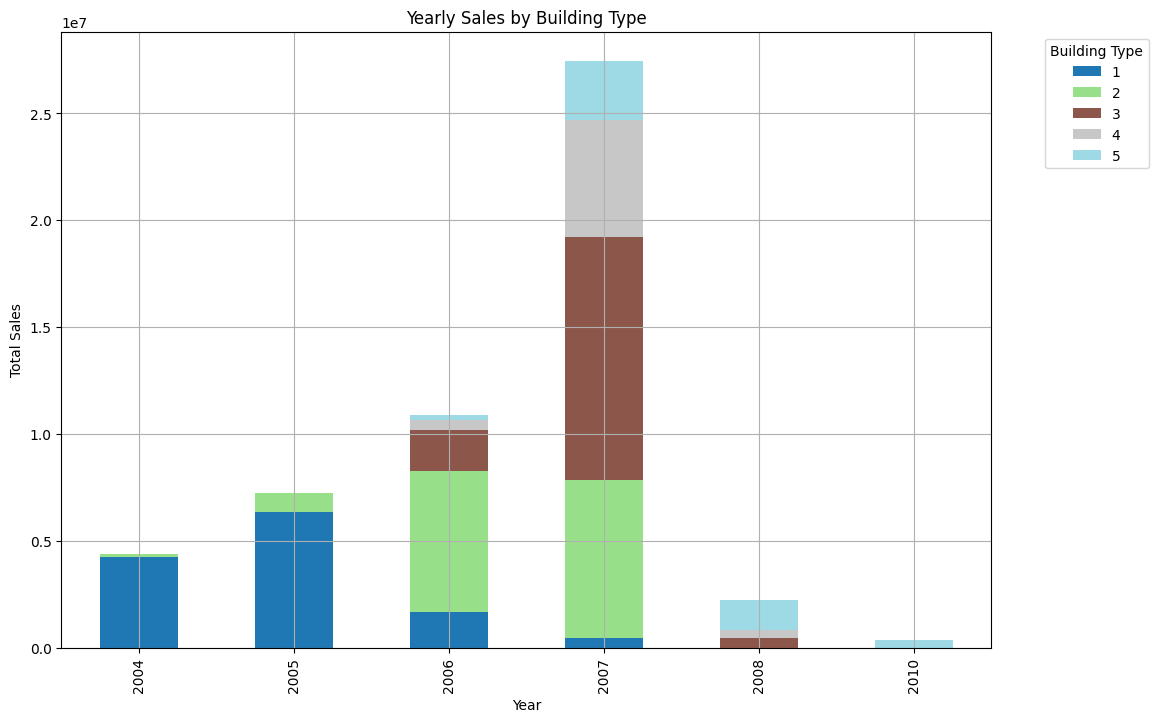

In [ ]:
# Yearly Sales by Building Type
yearly_sales_by_building = merged_df.groupby([merged_df['date_sale'].dt.year, 'building'])['price'].sum().unstack()
yearly_sales_by_building.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Yearly Sales by Building Type')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


6.6. Additional Visualizations

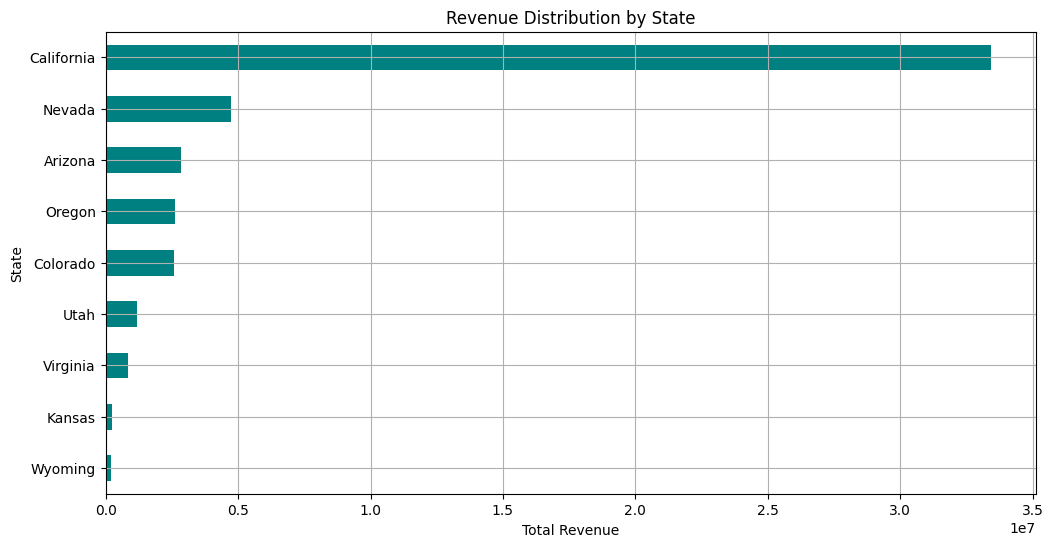

In [ ]:
# Revenue Distribution by State
plt.figure(figsize=(12, 6))
merged_df.groupby('state')['price'].sum().sort_values().plot(kind='barh', color='teal')
plt.title('Revenue Distribution by State')
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.grid(True)
plt.show()


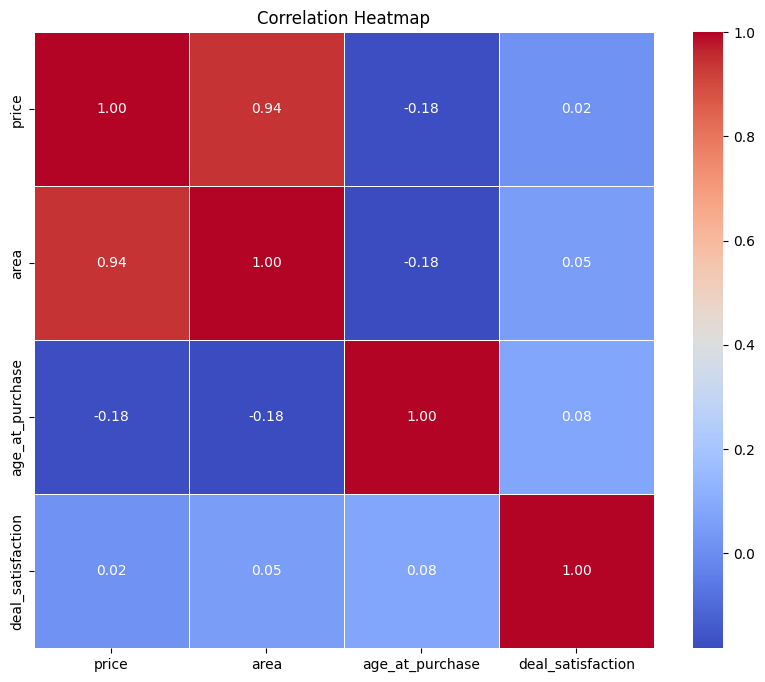

In [ ]:
# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df[['price', 'area', 'age_at_purchase', 'deal_satisfaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


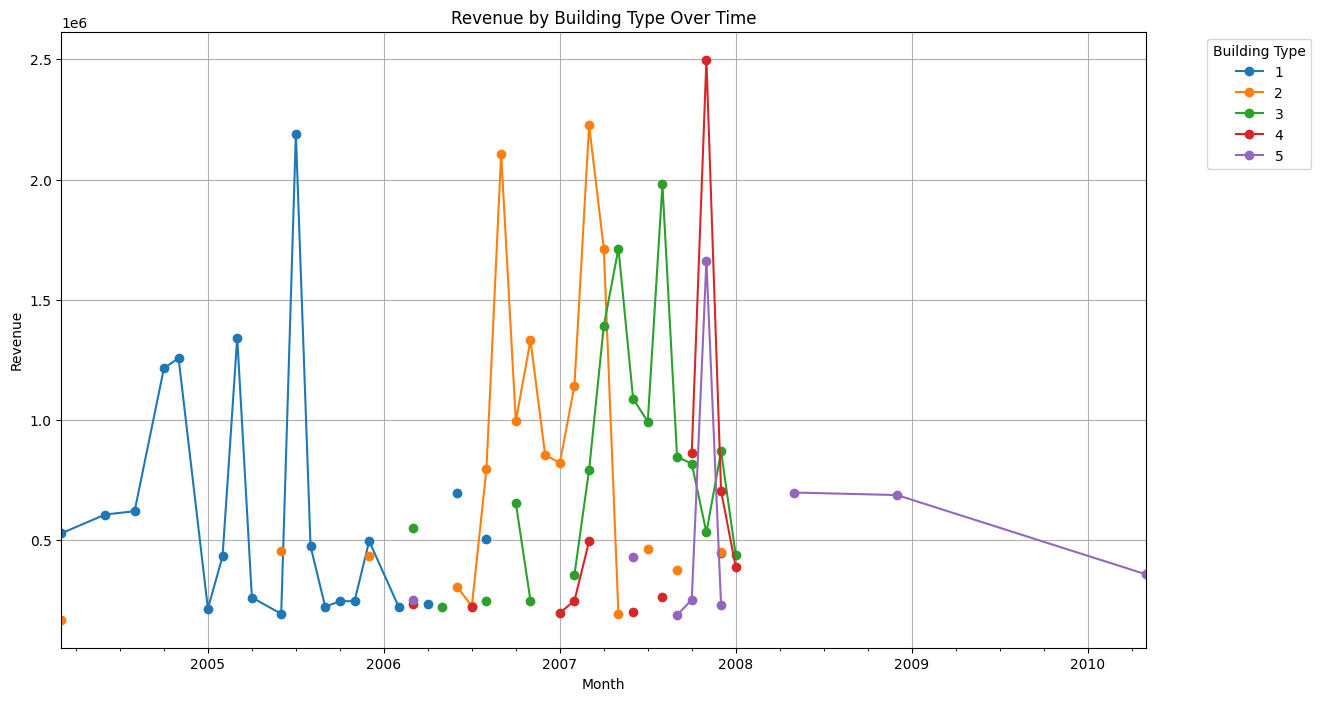

In [ ]:
# Revenue by Building Type Over Time
revenue_building_time = merged_df.groupby([merged_df['date_sale'].dt.to_period('M'), 'building'])['price'].sum().unstack()
revenue_building_time.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Revenue by Building Type Over Time')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
